# UCI Early Stage Diabetes Risk Prediction Dataset: Exploratory Data analysis
## Suhas. P. K

The dataset is downloaded and cleaned of all empty and null values.
A simple code to download the dataset from the url, unzip it and delete the zip file. 

```
import os
import urllib.request
import zipfile
import shutil

# URL of the dataset
url = "https://archive.ics.uci.edu/static/public/529/early+stage+diabetes+risk+prediction+dataset.zip"

# Directory to save the dataset
save_dir = "dataset"
zip_path = os.path.join(save_dir, "diabetes_dataset.zip")

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

try:
    # Download the dataset
    print("Downloading dataset...")
    urllib.request.urlretrieve(url, zip_path)
    print("Download complete.")

    # Unzip the dataset
    print("Unzipping dataset...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(save_dir)
    print("Unzipping complete.")

except urllib.error.URLError as e:
    print(f"Failed to download the dataset. URL error: {e}")
except zipfile.BadZipFile as e:
    print(f"Failed to unzip the dataset. Bad zip file error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    # Clean up: remove the zip file
    if os.path.exists(zip_path):
        os.remove(zip_path)
        print("Clean-up complete: zip file removed.")

    # Check if unzipped files exist
    if os.path.exists(save_dir):
        print(f"Dataset is available in the directory: {save_dir}")
    else:
        print("Unzipping failed, dataset not found.")

```

All the required libraries for EDA and Visualization is imported.


In [1]:
# EDA
import numpy as np
import pandas as pd 

# Viz
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Ignore warning
import warnings
warnings.filterwarnings("ignore")



### The diabetese dataset.

In [2]:
df = pd.read_csv('dataset/diabetes_data_upload.csv') 
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### Checking for any null values

In [3]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

### Converting the attribute heading to lower case and using '_' instead of space.

In [4]:
df.columns.str.lower()
df.columns = df.columns.str.lower().str.replace(" ","_") # attributes with space " " is replaced with "_"
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [5]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### Encoding dataset except 'age'.

|attribute|encoding-0|encoding-1|
|:------:|:------:|:------:|
|gender|Female|Male|
|polyuria|No|Yes|
|polydipsi|No|Yes|
|sudden_weight_loss|No|Yes|
|weakness|No|Yes|
|polyphagia|No|Yes|
|genital_thrush|No|Yes|
|visual_blurring|No|Yes|
|itching|No|Yes|
|irritability|No|Yes|
|delayed_healing|No|Yes|
|partial_paresis|No|Yes|
|muscle_stiffness|No|Yes|
|alopecia|No|Yes|
|obesity|No|Yes|
|class|Negative|Positive|


In [6]:
from sklearn.preprocessing import LabelEncoder

column_to_label_encode = ['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
       'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity','class']

LE = LabelEncoder()

# encoding other columns except age.
for col in column_to_label_encode:
    df[col] = LE.fit_transform(df[col].astype(str))
    encoded_df = df

encoded_df.dtypes

age                   int64
gender                int64
polyuria              int64
polydipsia            int64
sudden_weight_loss    int64
weakness              int64
polyphagia            int64
genital_thrush        int64
visual_blurring       int64
itching               int64
irritability          int64
delayed_healing       int64
partial_paresis       int64
muscle_stiffness      int64
alopecia              int64
obesity               int64
class                 int64
dtype: object

In [7]:
encoded_df.head(20)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [30]:
# Saving the encoded data.
encoded_df.to_csv('dataset/encoded_data.csv', sep=',', index=False, encoding='utf-8')

### Interesting Visual insights

In [9]:
class_count = encoded_df['class'].value_counts().reset_index()
class_count.columns = ['class', 'count']

class_count['class'] = class_count['class'].map({0: 'Negative', 1: 'Positive'})

# Custom colors for the bars
colors = {'Positive': 'red', 'Negative': 'green'}

fig = px.bar(class_count, x='class', y='count', 
             labels={'class': 'Class', 'count': 'Count'}, 
             title='Count vs Class',
             template="plotly_dark",
             color='class',  # Color the bars based on class
             color_discrete_map=colors,
             text='count'  # Add count numbers as text on the bars
            )

# Adjust the text position to be inside the bars
fig.update_traces(textposition='inside')
fig.update_layout(width=1000, height=600)
fig.update_traces(marker_line_width=2, marker_line_color='white', width=0.4)  # Adjust width as needed
fig.write_image("images/Count_vs_Class.png")

fig.show()


In [10]:
class_count = encoded_df['gender'].value_counts().reset_index()
class_count.columns = ['gender', 'count']

class_count['gender'] = class_count['gender'].map({0: 'Female', 1: 'Male'})

# Custom colors for the bars
colors = {'Male': 'orange', 'Female': 'green'}

fig = px.bar(class_count, x='gender', y='count', 
             labels={'gender': 'Gender', 'count': 'Count'}, 
             title='Count vs Gender',
             template="plotly_dark",
             color='gender',  # Color the bars based on class
             color_discrete_map=colors,
             text='count'  # Add count numbers as text on the bars
            )

# Adjust the text position to be inside the bars
fig.update_traces(textposition='inside')
fig.update_layout(width=1000, height=600)
fig.update_traces(marker_line_width=2, marker_line_color='white', width=0.4)  # Adjust width as needed
fig.write_image("images/Count_vs_Gender.png")

fig.show()


In [11]:
# Count of each class by gender
class_gender_count = encoded_df.groupby(['class', 'gender']).size().reset_index(name='count')

# Mapping 0 to 'Negative' and 1 to 'Positive' for class
class_gender_count['class'] = class_gender_count['class'].map({0: 'Negative', 1: 'Positive'})

# Mapping 1 to 'Male' and 0 to 'Female' for gender
class_gender_count['gender'] = class_gender_count['gender'].map({1: 'Male', 0: 'Female'})

# Custom colors for the bars
colors = {'Positive': 'red', 'Negative': 'green'}

# Plotting
fig = px.bar(class_gender_count, x='class', y='count', 
             color='gender', barmode='group',
             labels={'class': 'Class', 'count': 'Count', 'gender': 'Gender'}, 
             title='Count vs Class by Gender',
             template="plotly_dark",
             color_discrete_map={'Male': 'blue', 'Female': 'orange'},
             text='count'  # Add count numbers as text on the bars
            )

# Adjust the text position to be inside the bars
fig.update_traces(textposition='inside')

# Set the figure size (10, 6)
fig.update_layout(width=1000, height=600)

# Decrease the bar width for better grouping visibility
fig.update_traces(marker_line_width=1,  marker_line_color='white', width=0.3)
fig.write_image("images/Count_vs_Class_by_gender.png")

fig.show()

In [12]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']

temp_df = encoded_df.copy()
# Create age groups
temp_df['age_group'] = pd.cut(temp_df['age'], bins=bins, labels=labels, right=False)

# Convert class and gender columns
temp_df['class'] = temp_df['class'].map({0: 'Negative', 1: 'Positive'})
temp_df['gender'] = temp_df['gender'].map({0: 'Female', 1: 'Male'})

# Filter and create dataframes for males and females
male_df = temp_df[temp_df['gender'] == 'Male']
female_df = temp_df[temp_df['gender'] == 'Female']

# Create DataFrame-1: All males with age groups and class
dataframe_1 = male_df[['age_group', 'class']].groupby(['age_group', 'class']).size().reset_index(name='count')

# Create DataFrame-2: All females with age groups and class
dataframe_2 = female_df[['age_group', 'class']].groupby(['age_group', 'class']).size().reset_index(name='count')

# Display the dataframes
print("DataFrame-1 (Male):")
print(dataframe_1)
print("\nDataFrame-2 (Female):")
print(dataframe_2)


DataFrame-1 (Male):
   age_group     class  count
0       0-10  Negative      0
1       0-10  Positive      0
2      11-20  Negative      0
3      11-20  Positive      1
4      21-30  Negative     11
5      21-30  Positive      1
6      31-40  Negative     41
7      31-40  Positive     27
8      41-50  Negative     63
9      41-50  Positive     38
10     51-60  Negative     38
11     51-60  Positive     42
12     61-70  Negative     19
13     61-70  Positive     30
14     71-80  Negative      9
15     71-80  Positive      6
16     81-90  Negative      0
17     81-90  Positive      2
18       91+  Negative      0
19       91+  Positive      0

DataFrame-2 (Female):
   age_group     class  count
0       0-10  Negative      0
1       0-10  Positive      0
2      11-20  Negative      0
3      11-20  Positive      0
4      21-30  Negative      1
5      21-30  Positive      6
6      31-40  Negative      6
7      31-40  Positive     50
8      41-50  Negative      0
9      41-50  Positive     

In [13]:


# Create subplots: one row, two columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Male', 'Female'),
    shared_yaxes=True,
    horizontal_spacing=0.1
)

# Plot for Male
fig.add_trace(go.Bar(
    x=dataframe_1[dataframe_1['class'] == 'Positive']['age_group'],
    y=dataframe_1[dataframe_1['class'] == 'Positive']['count'],
    name='Positive',
    marker_color='red'
), row=1, col=1)

fig.add_trace(go.Bar(
    x=dataframe_1[dataframe_1['class'] == 'Negative']['age_group'],
    y=dataframe_1[dataframe_1['class'] == 'Negative']['count'],
    name='Negative',
    marker_color='green'
), row=1, col=1)

# Plot for Female
fig.add_trace(go.Bar(
    x=dataframe_2[dataframe_2['class'] == 'Positive']['age_group'],
    y=dataframe_2[dataframe_2['class'] == 'Positive']['count'],
    name='Positive',
    marker_color='orange'
), row=1, col=2)

fig.add_trace(go.Bar(
    x=dataframe_2[dataframe_2['class'] == 'Negative']['age_group'],
    y=dataframe_2[dataframe_2['class'] == 'Negative']['count'],
    name='Negative',
    marker_color='blue'
), row=1, col=2)

# Update layout
fig.update_layout(
    title_text='Distribution of Class by Age Group and Gender',
    xaxis_title='Age Group',
    yaxis_title='Count',
    barmode='group',
    template='plotly_dark',
    legend_title='Class',
    xaxis=dict(
        tickangle=-45
    ),
    xaxis2=dict(
        tickangle=-45
    )
)
fig.update_layout(width=1000, height=600)
fig.update_traces(marker_line_width=1,  marker_line_color='white', width=0.3)
fig.write_image("images/distribution_class_gender_age_group.png")
# Show plot
fig.show()


In [14]:

def distribution_plot(attribute):
    # Check if the attribute is in the DataFrame
    if attribute not in encoded_df.columns:
        raise ValueError(f"Attribute '{attribute}' not found in the DataFrame.")
    
    # Create a copy of the DataFrame and create age groups
    temp_df = encoded_df.copy()
    temp_df['age_group'] = pd.cut(temp_df['age'], bins=bins, labels=labels, right=False)
    
    # Convert class and gender columns
    temp_df['class'] = temp_df['class'].map({0: 'Negative', 1: 'Positive'})
    temp_df['gender'] = temp_df['gender'].map({0: 'Female', 1: 'Male'})
    
    # Filter and create dataframes for males and females
    male_df = temp_df[temp_df['gender'] == 'Male']
    female_df = temp_df[temp_df['gender'] == 'Female']
    
    # Create DataFrame-1: All males with age groups and attribute
    dataframe_1 = male_df.groupby(['age_group', 'class'])[attribute].sum().reset_index(name='count')
    
    # Create DataFrame-2: All females with age groups and attribute
    dataframe_2 = female_df.groupby(['age_group', 'class'])[attribute].sum().reset_index(name='count')
    
    # Create subplots: one row, two columns
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Male', 'Female'),
        shared_yaxes=True,
        horizontal_spacing=0.1
    )
    
    # Plot for Male
    fig.add_trace(go.Bar(
        x=dataframe_1[dataframe_1['class'] == 'Positive']['age_group'],
        y=dataframe_1[dataframe_1['class'] == 'Positive']['count'],
        name='Positive',
        marker_color='red'
    ), row=1, col=1)

    fig.add_trace(go.Bar(
        x=dataframe_1[dataframe_1['class'] == 'Negative']['age_group'],
        y=dataframe_1[dataframe_1['class'] == 'Negative']['count'],
        name='Negative',
        marker_color='green'
    ), row=1, col=1)

    # Plot for Female
    fig.add_trace(go.Bar(
        x=dataframe_2[dataframe_2['class'] == 'Positive']['age_group'],
        y=dataframe_2[dataframe_2['class'] == 'Positive']['count'],
        name='Positive',
        marker_color='orange'
    ), row=1, col=2)

    fig.add_trace(go.Bar(
        x=dataframe_2[dataframe_2['class'] == 'Negative']['age_group'],
        y=dataframe_2[dataframe_2['class'] == 'Negative']['count'],
        name='Negative',
        marker_color='blue'
    ), row=1, col=2)
    
    # Update layout
    fig.update_layout(
        title_text=f'Distribution of {attribute} by Age Group and Gender',
        xaxis_title='Age Group',
        yaxis_title='Count',
        barmode='group',
        template='plotly_dark',
        legend_title='Class',
        xaxis=dict(
            tickangle=-45
        ),
        xaxis2=dict(
            tickangle=-45
        )
    )
    fig.update_layout(width=1000, height=600)
    fig.update_traces(marker_line_width=1, marker_line_color='white', width=0.3)
    filename = f"images/distribution_{attribute}_class_gender_age_group.png"
    fig.write_image(filename)
    # Show plot
    fig.show()

# Example usage
distribution_plot('polydipsia')


In [15]:
distribution_plot('genital_thrush')

In [16]:
distribution_plot('polyuria')

In [17]:
distribution_plot('obesity')

In [18]:
distribution_plot('polyuria')

In [19]:
distribution_plot('sudden_weight_loss')

In [20]:
distribution_plot('alopecia')

In [21]:
distribution_plot('muscle_stiffness')

In [22]:
distribution_plot('partial_paresis')

In [23]:
distribution_plot('weakness')

In [24]:
distribution_plot('polyphagia')

In [25]:
distribution_plot('visual_blurring')

In [26]:
distribution_plot('itching')

In [27]:
distribution_plot('irritability')

In [28]:
distribution_plot('delayed_healing')

<Figure size 1500x1200 with 0 Axes>

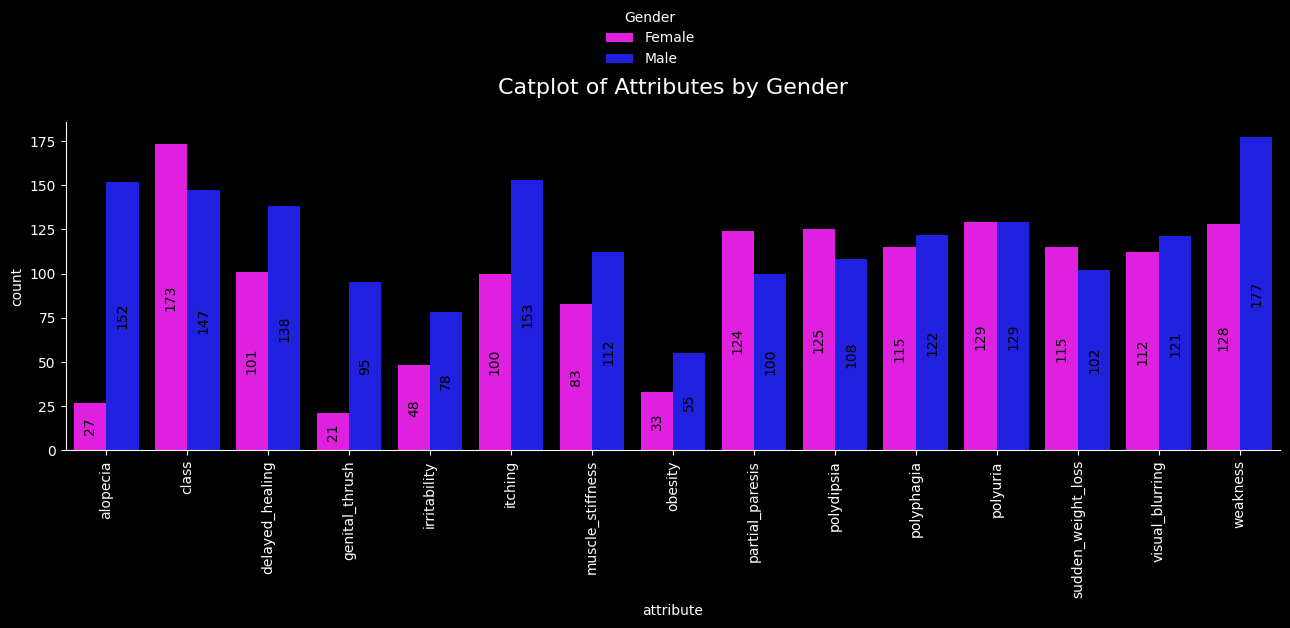

In [29]:
# Convert gender to a categorical variable with readable labels
temp_df = encoded_df.copy()
temp_df['gender'] = temp_df['gender'].map({0: 'Female', 1: 'Male'})

# Melt the dataframe to have attributes as a single column
melted_df = temp_df.melt(id_vars=['gender', 'age'], var_name='attribute', value_name='value')

# Compute counts of `1` for each attribute and gender
counts_df = melted_df[melted_df['value'] == 1].groupby(['attribute', 'gender']).size().reset_index(name='count')

# Plot catplot
plt.figure(figsize=(15, 12))
sns_plot = sns.catplot(
    x='attribute', y='count', hue='gender', data=counts_df, kind='bar',
    height=6, aspect=2, palette={'Female': 'magenta', 'Male': 'blue'}
)

# Adjust the x-axis labels rotation and title
plt.xticks(rotation=90)
plt.title('Catplot of Attributes by Gender', fontsize=16, pad=20)

# Adjust the legend
sns_plot._legend.set_bbox_to_anchor((0.5, 1.05))  # Move legend to top center
sns_plot._legend.set_loc('upper center')
sns_plot._legend.set_title('Gender')  # Set legend title
sns_plot._legend.set_frame_on(False)  # Optional: Remove the box around the legend

# Add value annotations on bars with increased height and customized appearance
for ax in sns_plot.axes.flat:
    for container in ax.containers:
        # Compute counts for each attribute and gender
        labels = [f'{int(label.get_height())}' for label in container]
        ax.bar_label(
            container,
            labels=labels,
            label_type='center',  # Position text in the center of the bars
            color='black',       # Text color
            rotation=90,        # Rotate text by 90 degrees
            fontsize=10
        )

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig('images/catplot_of_attributes_by_gender.png')

# Show the plot
plt.show()
